x_Initial:-263.951910,-396.833966,	f(x_Initial):1050.887258
i:0,t(i):100.00, badAccept:0.416667, f(x)_best:141.967523
i:10,t(i):81.71, badAccept:0.177778, f(x)_best:6.680885
i:20,t(i):66.76, badAccept:0.041667, f(x)_best:4.365411
i:30,t(i):54.55, badAccept:0.030612, f(x)_best:0.012648
i:40,t(i):44.57, badAccept:0.123711, f(x)_best:0.012648
i:50,t(i):36.42, badAccept:0.125000, f(x)_best:0.012648
i:60,t(i):29.76, badAccept:0.020408, f(x)_best:0.012648
i:70,t(i):24.31, badAccept:0.020000, f(x)_best:0.012648
i:80,t(i):19.86, badAccept:0.040404, f(x)_best:0.012648
i:90,t(i):16.23, badAccept:0.010204, f(x)_best:0.012648
i:100,t(i):13.26, badAccept:0.020202, f(x)_best:0.012648
i:110,t(i):10.84, badAccept:0.010101, f(x)_best:0.012648
i:120,t(i):8.85, badAccept:0.010000, f(x)_best:0.007733
i:130,t(i):7.23, badAccept:0.010000, f(x)_best:0.007733
i:140,t(i):5.91, badAccept:0.010101, f(x)_best:0.004479
i:150,t(i):4.83, badAccept:0.010000, f(x)_best:0.004479
i:160,t(i):3.95, badAccept:0.000000, f(x

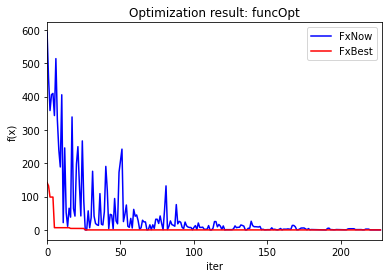

In [7]:
# Program: SimulatedAnnealing_v1.py
# Purpose: Simulated annealing algorithm for function optimization
# v1.0:
#   (1) 
#   (2) 
#   (3) 
#   (4) 
# Copyright 2021 YouCans, XUPT
# Crated2021-04-30

#  -*- coding: utf-8 -*-
import math                       # import module
import random                      # import module
import pandas as pd                 #  YouCans, XUPT
import numpy as np                   # imports the module numpy, which is abbreviated as NP
import matplotlib.pyplot as plt     #  matplotlib.pyplot,  plt
from datetime import datetime


#Subroutine: defines the objective function of the optimization problem
def cal_Energy(X, nVar):
    # Test function 1: schwefel test function
    # -500 <= Xi <= 500
    # Global extremum: (420.9687420.9687,...), f(x)=0.0
    sum = 0.0
    for i in range(nVar):
        sum += X[i] * np.sin(np.sqrt(abs(X[i])))
    fx = 418.9829 * nVar - sum
    return fx


#Subroutine: parameter setting of simulated annealing algorithm
def ParameterSetting():
    cName = "funcOpt"          # define the problem name
    nVar = 2                    # given number of arguments, y = f (x1,... Xn)
    xMin = [-500, -500]         # lower limit of given search space, x1_ min,.. xn_ min
    xMax = [500, 500]           # given upper limit of search space, x1_ max,.. xn_ max


    tInitial = 100.0            # (initial temperature)
    tFinal  = 1                 # (stop temperature)
    alfa    = 0.98              # set cooling parameters, t (k) = Alfa * t (k-1)
    meanMarkov = 100            # Markov chain length, i.e. number of inner loop runs
    scale   = 0.5               # defines the search step size, which can be set to a fixed value or gradually reduced
    return cName, nVar, xMin, xMax, tInitial, tFinal, alfa, meanMarkov, scale


#Simulated annealing algorithm

def OptimizationSSA(nVar,xMin,xMax,tInitial,tFinal,alfa,meanMarkov,scale):
    #= = = = = initialize random number generator======
    randseed = random.randint(1, 100)
    random.seed(randseed)  # random number generator can also be set as a specified integer

    
    
    
   #= = = = = initial solution of stochastic optimization problem======

    xInitial = np.zeros((nVar))   # initialization, create array 
    for v in range(nVar):
        
        # random. Uniform (min, max) randomly generates a real number in the range of [min, Max]
        xInitial[v] = random.uniform(xMin[v], xMax[v])
        
   #Call sub function cal_ Energy calculates the objective function value of the current solution
    fxInitial = cal_Energy(xInitial, nVar)


    
     #= = = = = simulated annealing algorithm initialization======
        
        
    xNew = np.zeros((nVar))         # initialization, create array 
    xNow = np.zeros((nVar))         # initialization, create array
    xBest = np.zeros((nVar))        # initialization, create array
    xNow[:]  = xInitial[:]          # initializes the current solution and sets the initial solution as the current solution
    xBest[:] = xInitial[:]          # initializes the optimal solution and sets the current solution as the optimal solution
    fxNow  = fxInitial              # sets the objective function of the initial solution to the current value 
    fxBest = fxInitial               # sets the objective function of the current solution as the optimal value
    
    
    print('x_Initial:{:.6f},{:.6f},\tf(x_Initial):{:.6f}'.format(xInitial[0], xInitial[1], fxInitial))

    recordIter = []                # initialization, number of outer cycles
    recordFxNow = []                # initialization, objective function value of current solution 
    recordFxBest = []               # initialization, objective function value of optimal solution 
    recordPBad = []                 # initialization, acceptance probability of inferior solution
    kIter = 0                       # external loop iteration times, number of temperature states
    totalMar = 0                    #   total Markov chain length
    totalImprove = 0                # fxbest improvement times
    nMarkov = meanMarkov            # fixed length Markov chain

   



 #= = = = = start simulated annealing optimization======
    #The external circulation ends when the current temperature reaches the termination temperature
    
    
    tNow = tInitial                 # (current temperature)
    while tNow >= tFinal:           # 
         #The external circulation ends when the current temperature reaches the termination temperature
            
        #At the current temperature, a sufficient number of state transitions (nmarkov) are performed to achieve thermal equilibrium
        kBetter = 0                 #  the number of times a good solution is obtained
        kBadAccept = 0              # number of times inferior solutions are accepted
        kBadRefuse = 0              # number of times inferior solutions are rejected

        
        #--- inner loop, the number of cycles is the length of Markov chain
        for k in range(nMarkov):    # inner loop, the number of cycles is the length of Markov chain
            totalMar += 1        # total Markov chain length counter

            #--- generate new solutions
            #Generate new solution: generate a new solution by random disturbance near the current solution, and the new solution must be within the range of [min, Max]
            #Scheme 1: only one of the n variables is disturbed, and the other N-1 variables remain unchanged
            
            xNew[:] = xNow[:]
            v = random.randint(0, nVar-1)   # generates random numbers between [0, nvar-1]
            xNew[v] = xNow[v] + scale * (xMax[v]-xMin[v]) * random.normalvariate(0, 1)
            #  random. Normal variable (0, 1): generate a random real number that obeys a normal distribution with a mean of 0 and a standard deviation of 1
            
            xNew[v] = max(min(xNew[v], xMax[v]), xMin[v])  # to ensure that the new solution is within the range of [min, Max]
            
            
            #--- calculate the objective function and energy difference
            #Call sub function cal_ Energy calculates the objective function value of the new solution
            
            fxNew = cal_Energy(xNew, nVar)
            deltaE = fxNew - fxNow

           #--- accept the new solution according to metropolis guidelines
            #Acceptance judgment: decide whether to accept the new solution according to metropolis criteria
            if fxNew < fxNow:  # better solution: if the objective function of the new solution is better than the current solution, the new solution is accepted 
                accept = True
                kBetter += 1
                
                
            else:  # tolerant solution: if the objective function of the new solution is worse than the current solution, the new solution is accepted with a certain probability
                pAccept = math.exp(-deltaE / tNow) # calculates the state transition probability of the tolerant solution
                if pAccept > random.random():
                    accept = True  # accept inferior solutions 
                    kBadAccept += 1
                else:
                    accept = False # reject inferior solutions
                    kBadRefuse += 1

            #Save new solution
            if accept == True:   # if a new solution is accepted, the new solution is saved as the current solution
                xNow[:] = xNew[:]
                fxNow = fxNew
                if fxNew < fxBest:  # if the objective function of the new solution is better than the optimal solution, the new solution is saved as the optimal solution
                    fxBest = fxNew
                    xBest[:] = xNew[:]
                    totalImprove += 1
                    scale = scale*0.99  # variable search step size to gradually reduce the search range and improve the search accuracy 
                    
       
                 
        #--- data sorting after internal circulation
        #Complete the current temperature search, save data and output
        
        pBadAccept = kBadAccept / (kBadAccept + kBadRefuse) # inferior solution
        recordIter.append(kIter)  # current number of outer loops 
        recordFxNow.append(round(fxNow, 4))  # the objective function value of the current solution
        recordFxBest.append(round(fxBest, 4)) # optimal solution objective function value
        recordPBad.append(round(pBadAccept, 4))  # optimal solution objective function value

        if kIter%10 == 0:                           # modular operation, remainder of quotient
            print('i:{},t(i):{:.2f}, badAccept:{:.6f}, f(x)_best:{:.6f}'.\
                format(kIter, tNow, pBadAccept, fxBest))
            
            
        #Slowly cool down to the new temperature. Cooling curve: t (k) = Alfa * t (k-1)
        tNow = tNow * alfa
        kIter = kIter + 1
        
        
        # ======  ======   = = = = end the simulated annealing process======

        
        
    print('improve:{:d}'.format(totalImprove))
    return kIter,xBest,fxBest,fxNow,recordIter,recordFxNow,recordFxBest,recordPBad

#Result verification and output 
def ResultOutput(cName,nVar,xBest,fxBest,kIter,recordFxNow,recordFxBest,recordPBad,recordIter):
   #============ verification and output of optimization results======

    fxCheck = cal_Energy(xBest,nVar)
    if abs(fxBest - fxCheck)>1e-3:  # check the objective function
        print("Error 2: Wrong total millage!")
        return
    else:
        print("\nOptimization by simulated annealing algorithm:")
        for i in range(nVar):
            print('\tx[{}] = {:.6f}'.format(i,xBest[i]))
        print('\n\tf(x):{:.6f}'.format(fxBest))
        
        

        #= = = = = write optimization results to data file======
        
    nowTime = datetime.now().strftime('%m%d%H%M')       # '02151456'
    fileName = "..\data\{}_{}.dat".format(cName,nowTime)# data file address and file name
    optRecord = {
        "iter":recordIter,
        "FxNow":recordFxNow,
        "FxBest":recordFxBest,
        "PBad":recordPBad}
    df_Record = pd.DataFrame(optRecord)
    df_Record.to_csv(fileName, index=False, encoding="utf_8_sig")
    with open(fileName, 'a+', encoding="utf_8_sig") as fid:
        fid.write("\nOptimization by simulated annealing algorithm:")
        for i in range(nVar):
            fid.write('\n\tx[{}] = {:.6f}'.format(i,xBest[i]))
        fid.write('\n\tf(x):{:.6f}'.format(fxBest))
    print(": %s " % fileName)
    

    #= = = = = graphical output of optimization results======
    
    plt.figure(figsize=(6, 4), facecolor='#FFFFFF')     # create a graphics window
    plt.title('Optimization result: {}'.format(cName))  # sets the drawing title
    plt.xlim((0, kIter))                                # sets the x-axis range
    plt.xlabel('iter')                                  # sets the x-axis label
    plt.ylabel('f(x)')                                  # sets the y-axis label
    plt.plot(recordIter, recordFxNow,'b-', label='FxNow')     # draw fxnow curve
    plt.plot(recordIter, recordFxBest, 'r-', label='FxBest')  # draw fxbest curve
    # plt.plot(recordIter,recordPBad,'r-',label='pBadAccept')  # plot the pbadaccept curve
    plt.legend()  # displays the legend
    plt.show()

    return





#Main program

def main():

    #Parameter setting, optimization problem parameter definition, simulated annealing algorithm parameter setting 
    [cName, nVar, xMin, xMax, tInitial, tFinal, alfa, meanMarkov, scale] = ParameterSetting()
    # print([nVar, xMin, xMax, tInitial, tFinal, alfa, meanMarkov, scale])

    #Simulated annealing algorithm
    [kIter,xBest,fxBest,fxNow,recordIter,recordFxNow,recordFxBest,recordPBad] \
        = OptimizationSSA(nVar,xMin,xMax,tInitial,tFinal,alfa,meanMarkov,scale)
    # print(kIter, fxNow, fxBest, pBadAccept)

   #Result verification and output
    ResultOutput(cName, nVar,xBest,fxBest,kIter,recordFxNow,recordFxBest,recordPBad,recordIter)


if __name__ == '__main__':
    main()
